In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import time
import requests
import datetime as dt
from scipy.stats import gompertz
from dateutil.relativedelta import *


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Phân tích Tổng quan các kênh

In [29]:
df = pd.read_csv('./data_scrape.csv')
df.head()

,Tên kênh,Số lượt thích,Số lượt xem,Số bình luận,Tiêu đề,Thời lượng video,Ngày phát hành,Tag
0,Wowy,418.0,16557,10.0,(VER JBEE7) NGƯỜI VS WOWY - DUET CHALLENGE #n...,59.0,2023-11-01,NaN
1,Wowy,3781.0,163655,231.0,WOWY - NGƯỜI (M/V),249.0,2023-11-01,"['Wowy', 'vietnam', 'saigon', 'vietnamese', 'r..."
2,Wowy,85.0,2858,3.0,11.11 - MV NGƯỜI - WOWY TEASER,29.0,2023-11-01,NaN
3,Wowy,257.0,5915,5.0,Lời cảm ơn của #Wowy 🙏 sau khi bản #rap #Người...,61.0,2023-11-01,"['Wowy', 'vietnam', 'saigon', 'vietnamese', 'r..."
4,Wowy,203.0,6833,7.0,WOWY DIỄN LIVE CA KHÚC MỚI ĐẦY CHIÊM NGHIỆM #w...,61.0,2023-11-01,"['Wowy', 'vietnam', 'saigon', 'vietnamese', 'r..."


### Năm bắt đầu hoạt động của các kênh

In [30]:
df['Ngày phát hành'] = pd.to_datetime(df['Ngày phát hành'], errors='coerce')

In [31]:
channel_start_year = df.groupby('Tên kênh')['Ngày phát hành'].min().dt.year
channel_start_year.sort_values()

Tên kênh
Wowy                        2012
Chi Pu Official             2013
JustaTeeMusic               2013
Hoàng Thùy Linh             2013
Phan Mạnh Quỳnh Official    2013
Trúc Nhân                   2013
Vũ Official                 2013
My Tam                      2013
Đàm Vĩnh Hưng               2013
Hòa Minzy                   2014
BÍCH PHƯƠNG                 2014
Sơn Tùng M-TP Official      2015
Đen Vâu Official            2015
MIN OFFICIAL                2015
ERIK Official               2017
MCK // Nger                 2018
tlinh                       2018
Pháo Northside              2020
AMEE                        2020
J97                         2020
Mono Official               2022
Name: Ngày phát hành, dtype: int32

### Phân phối video đã đăng tải theo năm

In [32]:
# Tạo cột mới 'Năm phát hành' từ cột 'Ngày phát hành'
df['Năm phát hành'] = df['Ngày phát hành'].dt.year

# Đếm số video theo từng năm
videos_per_year = df['Năm phát hành'].value_counts().sort_index()

# In ra kết quả
print(videos_per_year)

Năm phát hành
2012     16
2013    254
2014    147
2015    131
2016    201
2017    284
2018    251
2019    265
2020    394
2021    322
2022    488
2023    878
2024    668
Name: count, dtype: int64


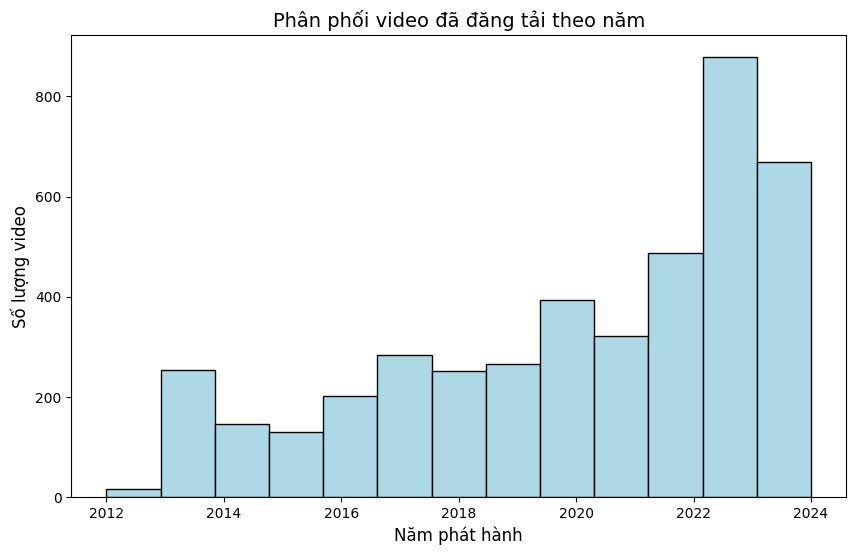

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(videos_per_year.index, weights=videos_per_year.values, bins=len(videos_per_year), color='lightblue', edgecolor='black')

# Thêm nhãn và tiêu đề
plt.xlabel("Năm phát hành", fontsize=12)
plt.ylabel("Số lượng video", fontsize=12)
plt.title("Phân phối video đã đăng tải theo năm", fontsize=14)

# Hiển thị biểu đồ
plt.show()


### Kênh phát hành nhiều Video nhất ở mỗi năm

In [34]:
# Tạo cột mới 'Năm phát hành'
df['Năm phát hành'] = df['Ngày phát hành'].dt.year

# Nhóm dữ liệu theo 'Năm phát hành' và 'Tên kênh', sau đó tính số lượng video mỗi kênh trong từng năm
videos_per_year_channel = df.groupby(['Năm phát hành', 'Tên kênh']).size().reset_index(name='Số video')

# Tìm kênh đăng tải nhiều video nhất mỗi năm
top_uploaders_per_year = videos_per_year_channel.loc[videos_per_year_channel.groupby('Năm phát hành')['Số video'].idxmax()]

# In kết quả
print(top_uploaders_per_year[['Năm phát hành', 'Tên kênh', 'Số video']])


     Năm phát hành         Tên kênh  Số video
0             2012             Wowy        16
4             2013           My Tam       101
15            2014           My Tam       106
20            2015      BÍCH PHƯƠNG        27
33            2016  Chi Pu Official        41
58            2017    Đàm Vĩnh Hưng        61
63            2018        Hòa Minzy        36
84            2019           My Tam        69
112           2020    Đàm Vĩnh Hưng       101
132           2021    Đàm Vĩnh Hưng        84
153           2022    Đàm Vĩnh Hưng       131
173           2023    Đàm Vĩnh Hưng       557
193           2024    Đàm Vĩnh Hưng       286


In [35]:
# Nhóm dữ liệu theo 'Năm phát hành' và 'Tên kênh', tính tổng lượt xem mỗi kênh trong từng năm
df['Ngày phát hành'] = pd.to_datetime(df['Ngày phát hành'], errors='coerce')
df['Năm phát hành'] = df['Ngày phát hành'].dt.year
views_per_year_channel = df.groupby(['Năm phát hành', 'Tên kênh'])['Số lượt xem'].sum().reset_index(name='Tổng lượt xem')

# Tìm kênh có tổng lượt xem cao nhất mỗi năm
top_views_per_year = views_per_year_channel.loc[views_per_year_channel.groupby('Năm phát hành')['Tổng lượt xem'].idxmax()]

# In kết quả
print(top_views_per_year[['Năm phát hành', 'Tên kênh', 'Tổng lượt xem']])


     Năm phát hành                Tên kênh  Tổng lượt xem
0             2012                    Wowy      123795345
4             2013                  My Tam      295198226
16            2014               Trúc Nhân      155040670
27            2015  Sơn Tùng M-TP Official      381355881
39            2016  Sơn Tùng M-TP Official      651311950
54            2017  Sơn Tùng M-TP Official      412845126
59            2018             BÍCH PHƯƠNG      405958060
91            2019        Đen Vâu Official      624473593
99            2020                     J97      647768708
126           2021  Sơn Tùng M-TP Official      274120413
137           2022         Hoàng Thùy Linh      207194277
161           2023             MCK // Nger      192030106
188           2024  Sơn Tùng M-TP Official      217203644


### Trực quan mối quan hệ số lượt xem và số video đăng tải

In [44]:
videos_per_channel = df.groupby('Tên kênh').size().reset_index(name='Số lượng video')

# Tính tổng số lượt xem theo từng kênh
views_per_channel = df.groupby('Tên kênh')['Số lượt xem'].sum().reset_index()

# Gộp dữ liệu để vẽ biểu đồ
merged_df = pd.merge(videos_per_channel, views_per_channel, on='Tên kênh')

# Vẽ biểu đồ phân tán
fig = px.scatter(merged_df, x='Số lượng video', y='Số lượt xem',
                 title='Tương quan giữa số lượng video và số lượt xem theo từng kênh',
                 labels={'Số lượng video': 'Số lượng video', 'Số lượt xem': 'Số lượt xem'},
                 hover_name='Tên kênh',
                 trendline='ols')
fig.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Phân tích hiệu suất Video

### Top 10 video có số lượt xem cao nhất

In [37]:
top_10_highest_views = df.sort_values(by='Số lượt xem', ascending=False)
top_10_highest_views.head(10)

,Tên kênh,Số lượt thích,Số lượt xem,Số bình luận,Tiêu đề,Thời lượng video,Ngày phát hành,Tag,Năm phát hành
2744,Sơn Tùng M-TP Official,2159445.0,378536453,294493.0,NƠI NÀY CÓ ANH | OFFICIAL MUSIC VIDEO | SƠN TÙ...,279.0,2017-02-01,"['son tung', 'sơn tùng', 'sơn tùng 2016', 'm-t...",2017
2720,Sơn Tùng M-TP Official,4149335.0,290673759,1252657.0,SƠN TÙNG M-TP | HÃY TRAO CHO ANH ft. Snoop Dog...,263.0,2019-07-01,"['son tung', 'sơn tùng', 'son tung mtp', 'sơn...",2019
2751,Sơn Tùng M-TP Official,1841417.0,273427739,295433.0,LẠC TRÔI | OFFICIAL MUSIC VIDEO | SƠN TÙNG M-TP,273.0,2016-12-01,"['son tung', 'sơn tùng', 'sơn tùng 2016', 'm-t...",2016
205,JustaTeeMusic,998567.0,268671235,45493.0,THẰNG ĐIÊN | JUSTATEE x PHƯƠNG LY | OFFICIAL MV,287.0,2018-10-01,"['thằng điên', 'thang dien', 'thằng điên mv', ...",2018
2022,BÍCH PHƯƠNG,528890.0,242782637,21679.0,BÍCH PHƯƠNG x MIRINDA - Chuyện Cũ Bỏ Qua (Offi...,211.0,2018-12-01,"['bích phương', 'bich phuong', 'bich phuong of...",2018
2759,Sơn Tùng M-TP Official,1239569.0,225322456,208638.0,Chúng Ta Không Thuộc Về Nhau | Official Music ...,243.0,2016-08-01,"['Sơn Tùng MTP', 'MTP', 'M-TP', 'Sơn Tùng', 'c...",2016
3808,J97,2716888.0,219238052,1998080.0,Jack | Hoa Hải Đường | Official Music Video,253.0,2020-09-01,"['J97', 'jack', 'đóm', 'phương tuấn', 'jack ph...",2020
2694,Sơn Tùng M-TP Official,2620235.0,213576908,2029187.0,SƠN TÙNG M-TP | MUỘN RỒI MÀ SAO CÒN | OFFICIAL...,289.0,2021-04-01,"['muộn rồi mà sao còn', 'muon roi ma sao con',...",2021
214,JustaTeeMusic,655713.0,196232956,29543.0,JustaTee - Đã Lỡ Yêu Em Nhiều (Official MV),267.0,2017-11-01,"['rapper việt', 'đã lỡ yêu em nhiều justatee',...",2017
3727,Đen Vâu Official,1101509.0,191843858,36158.0,Đen ft. MIN - Bài Này Chill Phết (M/V),274.0,2019-05-01,"['den', 'den vau', 'đen', 'đen vâu', 'rap hip ...",2019


### Top 10 Video có số lượt xem thấp nhất

In [38]:
top_10_lowest_views = df.sort_values(by='Số lượt xem')
top_10_lowest_views.head(10)

,Tên kênh,Số lượt thích,Số lượt xem,Số bình luận,Tiêu đề,Thời lượng video,Ngày phát hành,Tag,Năm phát hành
1745,Hoàng Thùy Linh,27.0,567,0.0,Một ngày nào hóa chiếc lá chênh vênh đầu cành....,56.0,2024-11-01,"['hoang thuy linh', 'hoàng thuỳ linh', 'banh t...",2024
3163,Chi Pu Official,107.0,633,7.0,"Chẳng thể nói thành lời, những cảm xúc tuyệt v...",60.0,2024-11-01,NaN,2024
1747,Hoàng Thùy Linh,41.0,680,1.0,Em đây chẳng phải Thúy Kiều #hoangthuylinh,55.0,2024-11-01,"['hoang thuy linh', 'hoàng thuỳ linh', 'banh t...",2024
1748,Hoàng Thùy Linh,38.0,753,1.0,"Mau mau lại đâyyyy, đừng để tui bắt được nhá #...",60.0,2024-11-01,"['hoang thuy linh', 'hoàng thuỳ linh', 'banh t...",2024
1750,Hoàng Thùy Linh,51.0,779,0.0,Vì niềm vui cần thiết gì đâu phải bán mua #hoa...,36.0,2024-11-01,"['hoang thuy linh', 'hoàng thuỳ linh', 'banh t...",2024
1749,Hoàng Thùy Linh,47.0,1004,2.0,"Kẻ cắp sẽ gặp bà già, bà già sẽ cho biết là......",59.0,2024-11-01,"['hoang thuy linh', 'hoàng thuỳ linh', 'banh t...",2024
1753,Hoàng Thùy Linh,68.0,1018,5.0,"Từng đêm mơ, con tim em luôn đợi chờ #hoangthu...",60.0,2024-11-01,"['hoang thuy linh', 'hoàng thuỳ linh', 'banh t...",2024
1746,Hoàng Thùy Linh,46.0,1076,3.0,Vẫn chưa thoát khỏi u mê của chiếc bài hát này...,34.0,2024-11-01,"['hoang thuy linh', 'hoàng thuỳ linh', 'banh t...",2024
1742,Hoàng Thùy Linh,70.0,1080,2.0,Muốn theo chân người đi khắp nơi #hoangthuylinh,60.0,2024-11-01,"['hoang thuy linh', 'hoàng thuỳ linh', 'banh t...",2024
1743,Hoàng Thùy Linh,43.0,1111,0.0,Hẹn ngày sau sẽ gặp nhau #hoangthuylinh,60.0,2024-11-01,"['hoang thuy linh', 'hoàng thuỳ linh', 'banh t...",2024


### Số lượt xem vs. Số lượt thích & Số bình luận

In [39]:
# Biểu đồ scatter giữa Số lượt xem và Số lượt thích, với đường xu hướng
fig1 = px.scatter(df, x='Số lượt xem', y='Số lượt thích', title='Tương quan giữa Số lượt xem với Số lượt thích',
                  hover_data=['Tiêu đề'], trendline="ols")

# Biểu đồ scatter giữa Số lượt xem và Số bình luận, với đường xu hướng
fig2 = px.scatter(df, x='Số lượt xem', y='Số bình luận', title='Tương quan giữa Số lượt xem với Số bình luận',
                  hover_data=['Tiêu đề'], trendline="ols")

# Hiển thị các biểu đồ
fig1.show()
fig2.show()

### Trực quan lượng Views mỗi Video của các kênh

In [40]:
# Biểu đồ Box Plot để phân tích số lượt xem của các video theo từng kênh
fig = px.box(df, x='Tên kênh', y='Số lượt xem', title='Phân phối số lượt xem của video theo kênh',
             labels={'Số lượt xem': 'Views', 'Tên kênh': 'Channel'},
             points="all")

# Hiển thị biểu đồ
fig.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Phân tích xu hướng thời gian hoạt động của các kênh

### Thời điểm được lựa chọn đăng tải Video

In [41]:
df['Thứ'] = df['Ngày phát hành'].dt.day_name()
video_per_day_of_week = df.groupby('Thứ').size()
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
video_per_day_of_week = video_per_day_of_week.reindex(weekdays)
video_per_day_of_week

Thứ
Monday       765
Tuesday      511
Wednesday    692
Thursday     475
Friday       760
Saturday     562
Sunday       534
dtype: int64

In [42]:
fig = px.bar(video_per_day_of_week, 
             x=video_per_day_of_week.index,
             y=video_per_day_of_week.values, 
             title="Số lượng video phát hành theo ngày trong tuần", 
             labels={'x': 'Ngày trong tuần', 'y': 'Số video'},  
             color=video_per_day_of_week.values,
             color_continuous_scale='RdBu')

# Hiển thị biểu đồ
fig.show()

In [45]:
# Tính số lượng video theo từng thứ trong tuần cho mỗi kênh
video_per_channel_day = df.groupby(['Tên kênh', 'Thứ']).size().reset_index(name='Số lượng video')

# Tìm ngày có số lượng video nhiều nhất cho mỗi kênh
max_video_per_channel = video_per_channel_day.loc[
    video_per_channel_day.groupby('Tên kênh')['Số lượng video'].idxmax()
]

# Kết hợp với tổng số video để có thông tin đầy đủ
total_video_per_channel = df.groupby('Tên kênh').size().reset_index(name='Tổng số video')
result = pd.merge(max_video_per_channel, total_video_per_channel, on='Tên kênh')

# Xuất kết quả
print(result[['Tên kênh', 'Thứ', 'Số lượng video', 'Tổng số video']])

                    Tên kênh        Thứ  Số lượng video  Tổng số video
0                       AMEE    Tuesday               9             40
1                BÍCH PHƯƠNG     Friday              46            174
2            Chi Pu Official  Wednesday              66            328
3              ERIK Official     Friday              37            155
4            Hoàng Thùy Linh     Friday              62            184
5                  Hòa Minzy  Wednesday              28            147
6                        J97    Tuesday              12             37
7              JustaTeeMusic     Friday              15             59
8                MCK // Nger  Wednesday              22             55
9               MIN OFFICIAL    Tuesday              35            146
10             Mono Official     Monday              21             88
11                    My Tam   Saturday              96            502
12  Phan Mạnh Quỳnh Official     Friday              20             70
13    

In [46]:
video_per_channel_day = df.groupby(['Tên kênh', 'Thứ']).size().reset_index(name='Số lượng video')
total_video_per_channel = df.groupby('Tên kênh').size().reset_index(name='Tổng số video')
result = pd.merge(max_video_per_channel, total_video_per_channel, on='Tên kênh')
print(result[['Tên kênh', 'Thứ', 'Số lượng video', 'Tổng số video']])

                    Tên kênh        Thứ  Số lượng video  Tổng số video
0                       AMEE    Tuesday               9             40
1                BÍCH PHƯƠNG     Friday              46            174
2            Chi Pu Official  Wednesday              66            328
3              ERIK Official     Friday              37            155
4            Hoàng Thùy Linh     Friday              62            184
5                  Hòa Minzy  Wednesday              28            147
6                        J97    Tuesday              12             37
7              JustaTeeMusic     Friday              15             59
8                MCK // Nger  Wednesday              22             55
9               MIN OFFICIAL    Tuesday              35            146
10             Mono Official     Monday              21             88
11                    My Tam   Saturday              96            502
12  Phan Mạnh Quỳnh Official     Friday              20             70
13    

In [47]:
video_per_channel_day = df.groupby(['Tên kênh', 'Thứ']).size().reset_index(name='Số lượng video')
video_per_channel_day_filtered = video_per_channel_day[video_per_channel_day['Tên kênh'] != 'Đàm Vĩnh Hưng']
heatmap_data = video_per_channel_day_filtered.pivot(index='Tên kênh', columns='Thứ', values='Số lượng video')
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[weekdays]  # Sắp xếp lại cột theo thứ tự ngày trong tuần

# Vẽ biểu đồ heatmap
fig = px.imshow(heatmap_data, 
                labels={'x': 'Ngày trong tuần', 'y': 'Tên kênh', 'color': 'Số lượng video'},
                title="Số lượng video đăng tải của các kênh theo ngày trong tuần",
                color_continuous_scale='Blues', 
                aspect='auto',
                height=800
)

fig.show()

In [48]:
son_tung_df = df[df['Tên kênh'] == 'Sơn Tùng M-TP Official'].copy()  # Dùng .copy() để tránh cảnh báo

# Chuyển cột 'Ngày phát hành' thành kiểu datetime nếu chưa
son_tung_df['Ngày phát hành'] = pd.to_datetime(son_tung_df['Ngày phát hành'])

# Nhóm theo tháng (hoặc năm), tính số lượng video
son_tung_df['Tháng'] = son_tung_df['Ngày phát hành'].dt.to_period('M').astype(str)  # Chuyển thành chuỗi

# Đếm số video theo tháng
video_per_month = son_tung_df.groupby('Tháng').size().reset_index(name='Số lượng video')

# Vẽ biểu đồ line thể hiện số lượng video theo tháng
fig = px.line(video_per_month, 
              x='Tháng',  # Trục X là tháng
              y='Số lượng video',  # Trục Y là số lượng video
              title="Số lượng video đăng tải của kênh Sơn Tùng M-TP Official theo tháng",  # Tiêu đề
              labels={'Tháng': 'Tháng', 'Số lượng video': 'Số video'},  # Nhãn trục
              markers=True)  # Thêm các điểm đánh dấu trên đường

# Hiển thị biểu đồ
fig.show()